In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r'C:\Users\Dell\Desktop\Machine Learning\Kaggle\Music artists similarity (using NMF)\scrobbler-small-sample.csv')
artist=pd.read_csv(r'C:\Users\Dell\Desktop\Machine Learning\Kaggle\Music artists similarity (using NMF)\artists.csv',names=['Artists'])

In [3]:
print(df.shape)
print(artist.shape)

(2894, 3)
(111, 1)


In [4]:
# Contain user details, artist details and the number of times the artist was played by user.
df.head()

,user_offset,artist_offset,playcount
0,1,79,58
1,1,84,80
2,1,86,317
3,1,89,64
4,1,96,159


In [5]:
# Contains artist names.
artist.head()

,Artists
0,Massive Attack
1,Sublime
2,Beastie Boys
3,Neil Young
4,Dead Kennedys


In [6]:
# Cretaing information about how many artists a listener listens to.
freq=df['user_offset'].value_counts()
freq.head()

253    28
227    23
306    22
166    21
302    20
Name: user_offset, dtype: int64

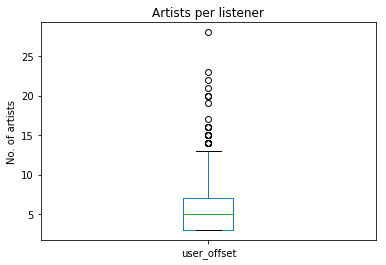

This shows that listeners listen to atlest 5 artists on an average.


In [7]:
# Box plot to display the result
freq.plot(kind='box')
plt.title('Artists per listener')
plt.ylabel('No. of artists')
plt.show()
print('This shows that listeners listen to atlest 5 artists on an average.')

In [8]:
# DataFrame containing information about the most popular artists.
artist_freq=pd.DataFrame(df['artist_offset'].value_counts())
artist_freq.sort_index(ascending=True,inplace=True)
artist_freq.index=artist['Artists']
artist_freq.head()

,artist_offset
Artists,
Massive Attack,44
Sublime,34
Beastie Boys,35
Neil Young,20
Dead Kennedys,12


In [9]:
from pylab import rcParams
rcParams['figure.figsize'] = 50,30

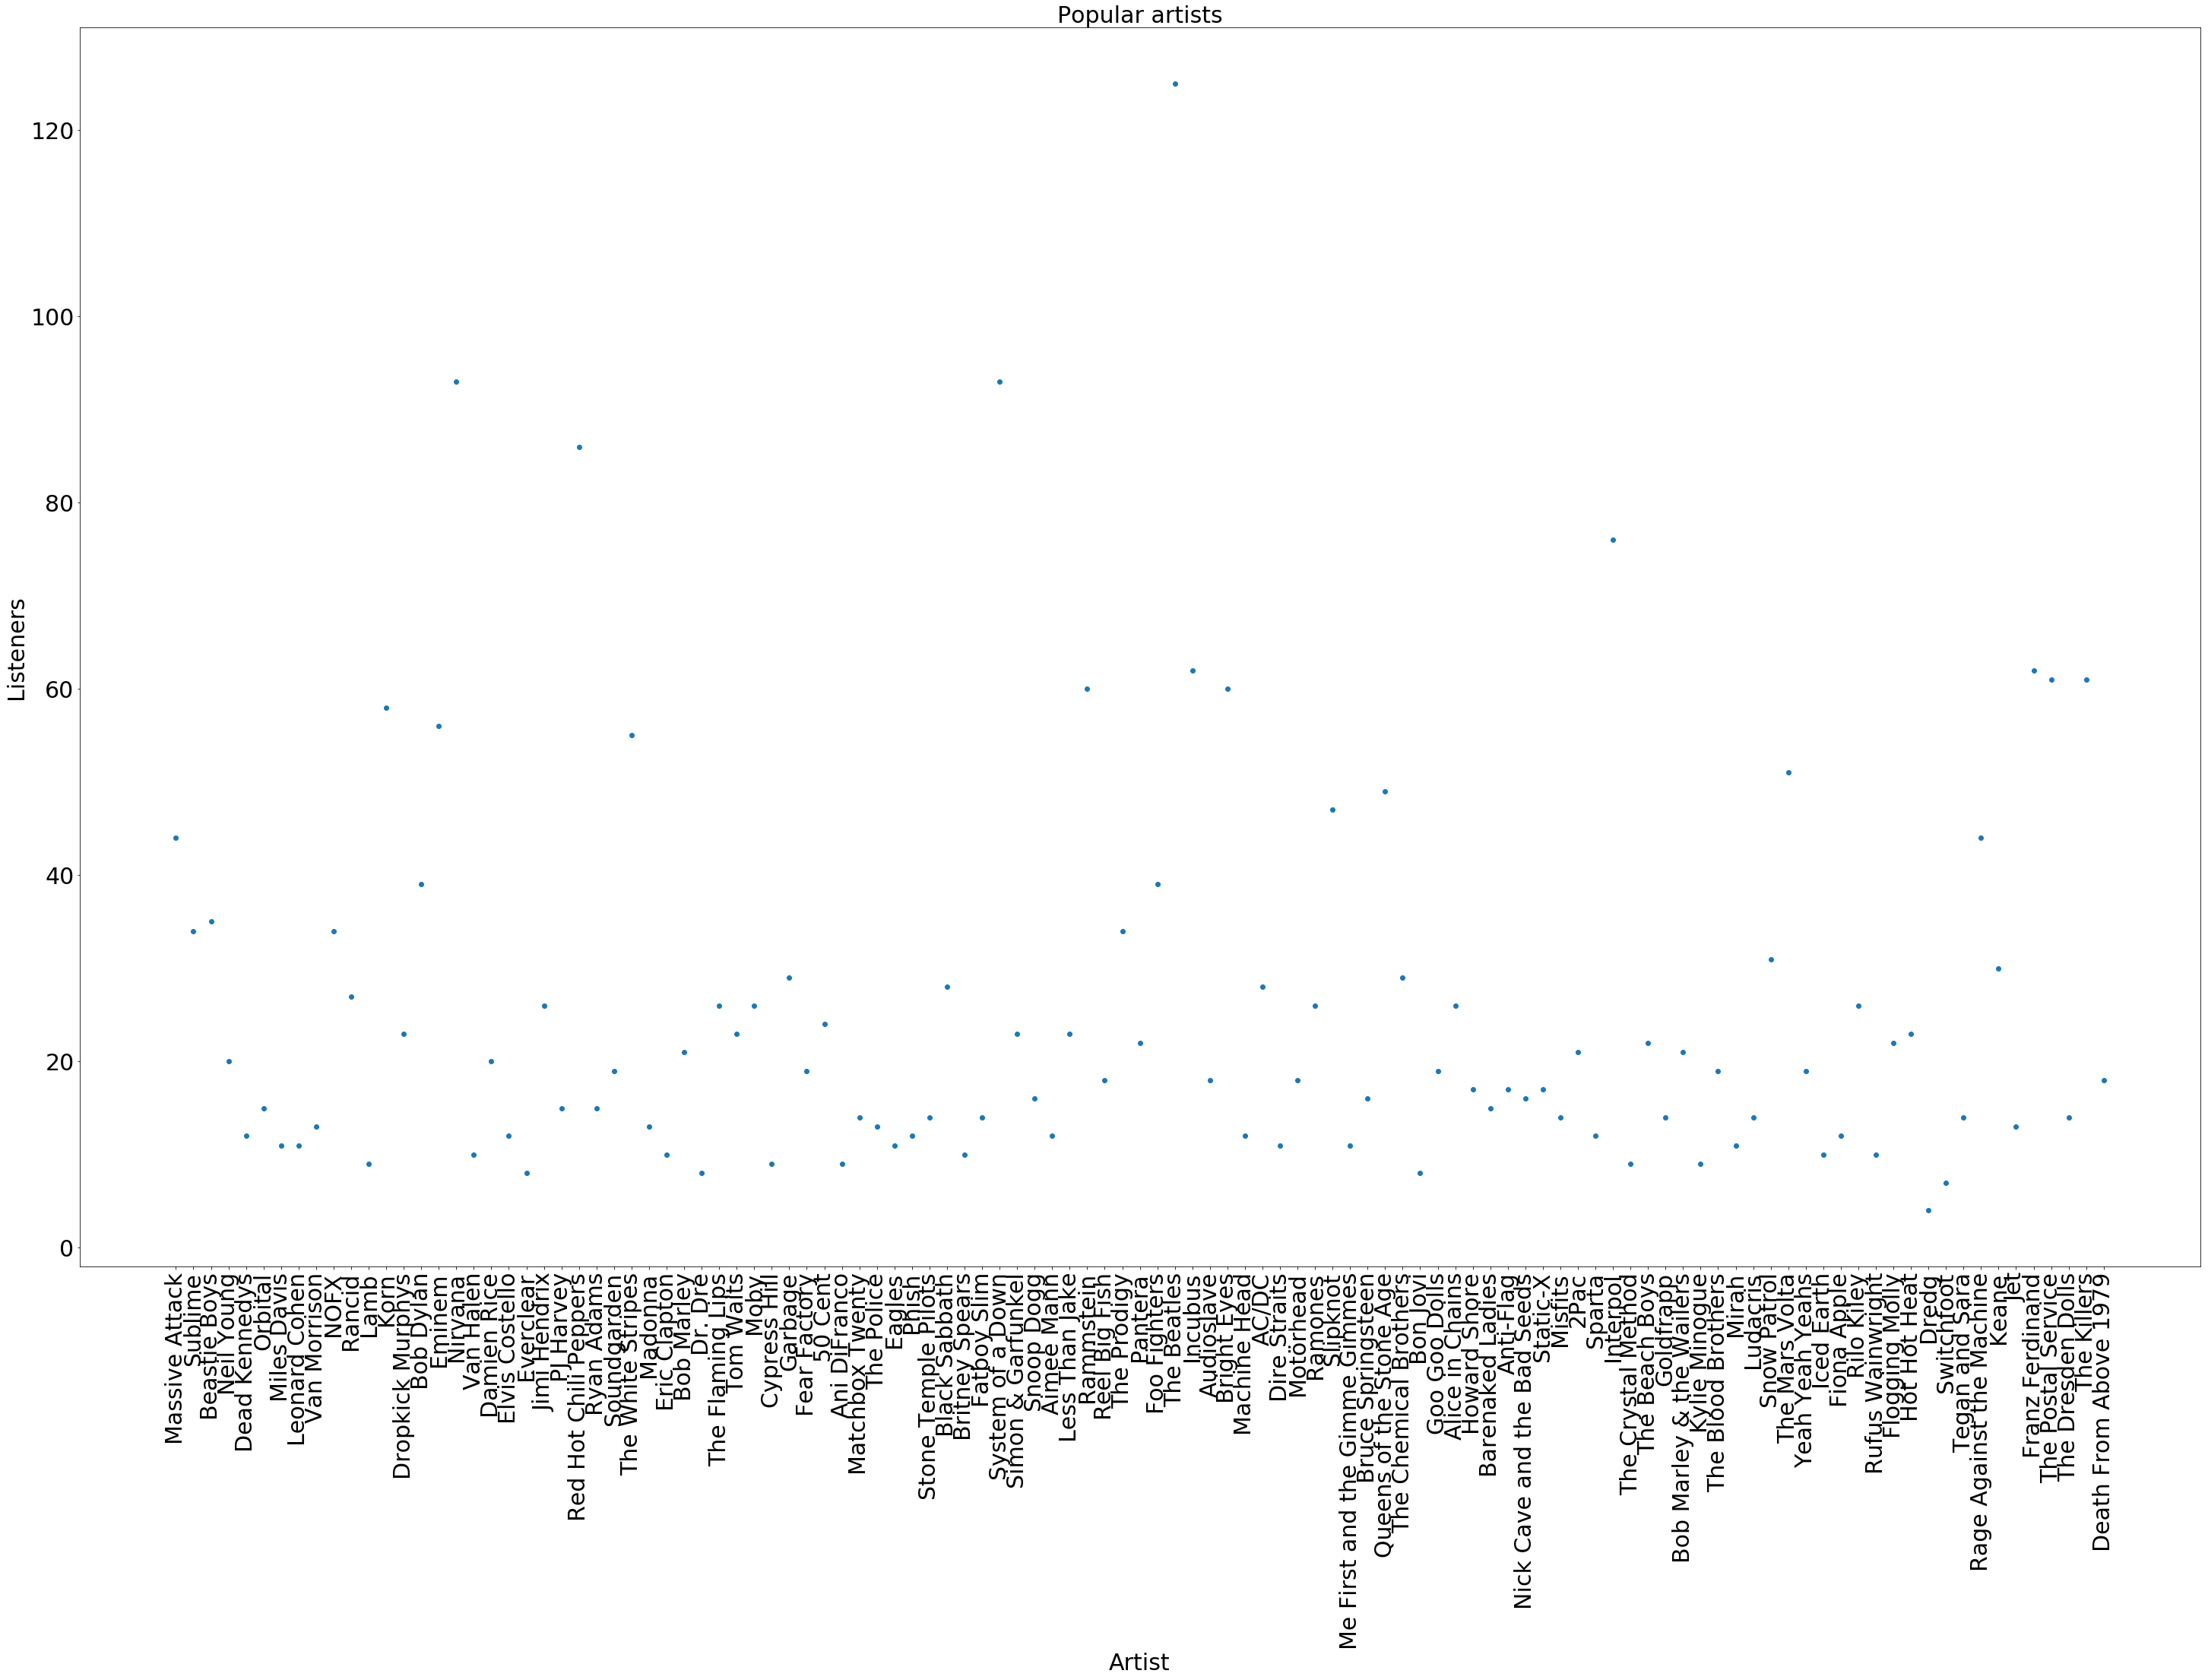

The Beatles is the most popular


In [10]:
# Scatter plot to show popularity of artists
plt.scatter(x=artist_freq.index,y=artist_freq.artist_offset)
plt.xlabel('Artist',fontsize=30)
plt.ylabel('Listeners',fontsize=30)
plt.yticks(fontsize=30)
plt.xticks(rotation=90,fontsize=30)
plt.title('Popular artists',fontsize=30)
plt.show()
print('The Beatles is the most popular')

In [11]:
# combining artists names with their relevant information
df=pd.pivot_table(df,values='playcount',index='artist_offset',columns='user_offset')
df.head()

user_offset,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
artist_offset,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,105.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,128.0,211.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,270.0,NaN,105.0,97.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# replacing NaN values with 0
df.fillna(0,inplace=True)
df.head()

user_offset,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
artist_offset,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,105.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,128.0,211.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,270.0,0.0,105.0,97.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
# setting index as artist name
df.set_index(artist['Artists'],inplace=True)
df.head(10)

user_offset,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
Artists,,,,,,,,,,,,,,,,,,,,,
Massive Attack,0.0,0.0,105.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Sublime,128.0,211.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,270.0,0.0,105.0,97.0,0.0,0.0,0.0
Beastie Boys,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Neil Young,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Dead Kennedys,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Orbital,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,311.0,0.0,0.0,0.0,0.0,0.0
Miles Davis,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Leonard Cohen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Van Morrison,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
from sklearn.decomposition import NMF

nmf=NMF(n_components=7)
nmf.fit(df)
nmf_features=nmf.transform(df)

In [15]:
W=nmf_features
W.shape # component weights
# 111 artists and 7 components

(111, 7)

In [16]:
H=nmf.components_ # components
H.shape

(7, 500)

In [17]:
# Deriving components of "Bob Marley"
df=pd.DataFrame(nmf_features,index=artist['Artists'])
df.loc['Bob Marley']

0    0.056248
1    0.047797
2    0.600062
3    0.012912
4    0.090046
5    0.140229
6    0.356928
Name: Bob Marley, dtype: float64

In [18]:
# Trying to re-create the original matrix
pd.DataFrame(W.dot(H))

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,0.337040,0.102282,0.644149,0.384018,0.439175,1.548148,0.039265,0.076611,0.345357,2.319289,...,0.289700,0.084216,0.061285,0.110925,0.213281,0.315441,0.444892,0.423840,1.056299,0.752091
1,0.574679,0.614487,0.739129,0.263390,0.326370,0.604131,0.290809,0.814850,0.949778,0.843468,...,0.226407,0.064515,0.278409,0.571617,0.121029,0.749598,0.404316,0.356533,2.158713,1.278754
2,0.269645,0.071388,0.592771,0.366771,0.998988,0.984027,0.025267,0.040943,0.239802,1.892931,...,0.275386,0.077778,0.035954,0.070134,0.142427,0.200968,0.422408,0.323498,0.842955,0.537407
3,0.174662,0.260662,6.153937,5.393705,0.084094,0.000000,0.145822,0.145144,0.432570,0.095170,...,4.034925,0.891022,0.103671,0.167638,0.158019,0.017160,1.639597,0.045228,8.933561,0.180058
4,0.161141,0.154910,0.575115,0.148492,0.084706,0.172552,0.074913,0.201108,0.286377,0.322593,...,0.119290,0.032344,0.071731,0.158475,0.037222,0.189033,0.618584,0.106354,0.670544,0.346137
5,0.429172,0.086399,0.503974,0.289936,0.558306,1.961425,0.027097,0.042932,0.375164,3.221583,...,0.217972,0.072969,0.055433,0.098499,0.263938,0.359788,0.415399,0.525309,0.889842,0.882398
6,0.026657,0.025577,0.131288,0.113609,0.030873,0.047917,0.012225,0.029038,0.041121,0.068761,...,0.085872,0.019736,0.011782,0.021813,0.010551,0.029287,0.023922,0.019884,0.251880,0.056564
7,0.045184,0.035373,0.670754,0.676397,0.025711,0.098686,0.018105,0.018552,0.054874,0.209822,...,0.505563,0.112012,0.023919,0.017935,0.032354,0.018094,0.024156,0.026365,1.226044,0.054934
8,0.009919,0.015778,0.284390,0.292308,0.042599,0.000409,0.008289,0.009703,0.017726,0.004560,...,0.218528,0.048112,0.008486,0.007489,0.008491,0.002580,0.000704,0.003452,0.512480,0.011824
9,9.886024,11.883280,9.503602,0.000000,3.730722,3.696065,5.671146,16.211211,17.574795,4.729075,...,0.596100,0.325619,5.206642,11.108354,1.200853,13.611876,7.842236,4.955475,31.940712,22.004535


In [19]:
# Normalizing the feature values
from sklearn.preprocessing import normalize

#normalizing the features
norm=normalize(nmf_features)
#setting normalized data as the new data with index as artist name
df=pd.DataFrame(norm,index=artist['Artists'])

#selecting Bob Marley
bob=df.loc['Bob Marley']

In [20]:
bob.shape # Vector with 7 components.

(7,)

In [21]:
# Taking dot product of the two matrices, we get the similarity between 'Bob Marley' and other artists.
similar=df.dot(bob)

In [22]:
# Displaying only those Artists that have a similarity of >88%.
display=pd.DataFrame(similar[similar>0.88],columns=['Similarity'])
# Printing the artists in descending order of similarity.
display.sort_values('Similarity',ascending=False)

,Similarity
Artists,
Bob Marley,1.000000
Phish,0.988232
Miles Davis,0.987641
Interpol,0.987363
Simon & Garfunkel,0.983807
PJ Harvey,0.977575
Everclear,0.961499
Red Hot Chili Peppers,0.958802
Elvis Costello,0.956537
